In this analysis, I will first look at the data and run an OLS regression.
Next, I will use the K-Nearest-Neighbors regression to analyze the date and look at the differences between the two.

In [63]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn import linear_model
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn import neighbors



#Statsmodels is a Python package that allows users to explore data, 
#estimate statistical models, and perform statistical tests. ... 
#Statsmodels is built on top of the numerical libraries NumPy and SciPy,
#integrates with Pandas for data handling and uses Patsy for an R-like formula interface.

To start with we load the Longley dataset of US macroeconomic data from the Rdatasets website.

In [38]:
 df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/datasets/longley.csv', index_col=0)


In [39]:
print(df.shape)

(16, 7)


In [40]:
df.head()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Year,Employed
1947,83.000,234.289,235.600,159.000,107.608,1947,60.323
1948,88.500,259.426,232.500,145.600,108.632,1948,61.122
1949,88.200,258.054,368.200,161.600,109.773,1949,60.171
1950,89.500,284.599,335.100,165.000,110.929,1950,61.187
1951,96.200,328.975,209.900,309.900,112.075,1951,63.221


In [41]:
#set the values

y = df.Employed

x = df.GNP

x = sm.add_constant(x)

x.head()

,const,GNP
1947,1.000,234.289
1948,1.000,259.426
1949,1.000,258.054
1950,1.000,284.599
1951,1.000,328.975


In [42]:
sm.OLS(y, x)

#look up what this does

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 1947 to 1962
Data columns (total 7 columns):
GNP.deflator    16 non-null float64
GNP             16 non-null float64
Unemployed      16 non-null float64
Armed.Forces    16 non-null float64
Population      16 non-null float64
Year            16 non-null int64
Employed        16 non-null float64
dtypes: float64(6), int64(1)
memory usage: 1.0 KB


In [44]:
x.values

array([[  1.   , 234.289],
       [  1.   , 259.426],
       [  1.   , 258.054],
       [  1.   , 284.599],
       [  1.   , 328.975],
       [  1.   , 346.999],
       [  1.   , 365.385],
       [  1.   , 363.112],
       [  1.   , 397.469],
       [  1.   , 419.18 ],
       [  1.   , 442.769],
       [  1.   , 444.546],
       [  1.   , 482.704],
       [  1.   , 502.601],
       [  1.   , 518.173],
       [  1.   , 554.894]])

In [57]:
y.values

array([60.323, 61.122, 60.171, 61.187, 63.221, 63.639, 64.989, 63.761,
       66.019, 67.857, 68.169, 66.513, 68.655, 69.564, 69.331, 70.551])

In [46]:
len(x)

16

In [47]:
len(y)

16

In [48]:
#find means of the values

mean_x = np.mean(x)
mean_y = np.mean(y)

In [49]:
#instantiate our model

regr = linear_model.LinearRegression()

#fit our model to the data
regr.fit(x, y)

#display the attributes we have calculated
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('R-Squared: \n', regr.score(x, y))



Coefficients: 
 [0.         0.03475229]
Intercept: 
 51.84358978188415
R-Squared: 
 0.9673737718541237


ValueError: x and y must be the same size

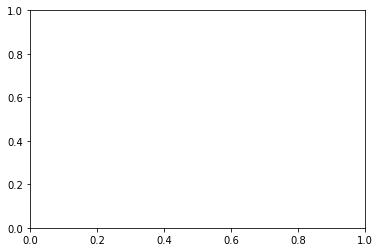

In [50]:
#plot outputs
plt.scatter(x, y, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth = 3)
plt.show()

#how can i fix this error??

So, what information can I gather from this analysis? What else could I do? What have I learned? And how could I proceed if this were a real world problem? How do I check the accuracy of the model?

Now we are going to look at the data using KNN

In [ ]:
neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')


In [59]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(df, test_size = 0.3)

x_train = train.drop('GNP', axis=1)
y_train = train['Employed']

x_test = test.drop('GNP', axis = 1)
y_test = test['Employed']


In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [64]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    
#lower RMSE indicates a better fit

RMSE value for k=  1 is: 1.9432200595918105
RMSE value for k=  2 is: 1.8137298448225412
RMSE value for k=  3 is: 1.93359334458469
RMSE value for k=  4 is: 1.8426892474044512
RMSE value for k=  5 is: 1.976106598339265
RMSE value for k=  6 is: 2.0302746023903007
RMSE value for k=  7 is: 2.2734582674589716
RMSE value for k=  8 is: 2.5421927180339776
RMSE value for k=  9 is: 2.996591569528268
RMSE value for k=  10 is: 3.4177501146221876
RMSE value for k=  11 is: 3.842403639940945


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 11, n_neighbors = 12

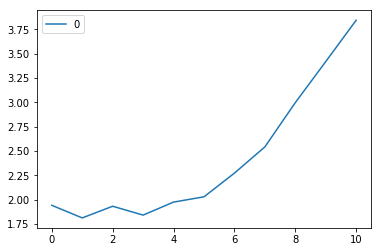

In [65]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [69]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, x, y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, x, y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -16.51 (+/- 48.88)


NameError: name 'knn_w' is not defined

In [ ]:
neighbors.fit(x, y)

# Arrays, not data frames, for the mesh.
x = np.array(x)
y = np.array(y)

#mesh size
h = .01

# Plot the decision boundary. We assign a color to each point in the mesh.


x_min = x[:,0].min() - .5
x_max = x[:,0].max() + .5
y_min = x[:,1].min() - .5
y_max = x[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('GNP')
plt.ylabel('Employed')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

In [ ]:
#So, for both i need to some plots i think and some help on what they are telling me
#what are the differences, how can i read them, is this enough info etc